In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#time series
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

<ipython-input-1-87afc0c91167>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv('./data/zm_test.csv', index_col = 0)

In [3]:
df.head()

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2019-04-18,65.00,66.000,60.321,62.0,25764659.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,61.00,68.900,59.940,65.7,9949738.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-23,66.87,74.169,65.550,69.0,6786513.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-24,71.40,71.500,63.160,63.2,4973529.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-25,64.74,66.850,62.600,65.0,3863275.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(442, 11)

In [5]:
df.dtypes

1. open                    float64
2. high                    float64
3. low                     float64
4. close                   float64
5. volume                  float64
reportedDate                object
surprise                   float64
surprisePercentage         float64
reported_Quarterly_EPS     float64
estimated_Quarterly_EPS    float64
reported_Annual_EPS        float64
dtype: object

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df['2021']

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2021-01-04,340.40,363.09,339.2000,359.98,8598300.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,360.39,365.01,349.0000,360.83,4983521.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,351.00,352.94,341.9200,344.41,7124614.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,346.00,354.48,341.6000,342.50,5601170.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,345.20,350.00,340.3400,349.61,5009213.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,344.98,349.96,336.8500,337.71,3360357.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-12,333.20,358.90,331.1000,356.81,8890435.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-13,360.00,384.23,348.6512,364.63,14056546.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-14,371.00,384.95,370.5000,383.24,9310967.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-15,397.71,404.44,382.0701,384.53,12799509.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['2020-12']

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2020-12-01,434.7200,434.9900,401.7200,406.31,20694206.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-02,399.0000,424.5500,394.5700,412.86,10962837.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-03,413.0000,419.1700,405.0200,413.54,6306724.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-04,409.2600,418.8800,408.1861,410.01,4447314.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-07,411.0000,416.8000,405.4538,407.85,4427276.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-08,408.8700,419.5000,406.7500,412.00,5319440.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-09,406.7478,409.9900,381.5000,385.36,8956659.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-10,382.7300,399.0000,380.2700,397.96,4572146.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,395.3500,397.3393,384.6136,397.01,4677441.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,388.9500,396.7500,376.6800,395.99,6820120.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.resample('M').mean()

,1. open,2. high,3. low,4. close,5. volume,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2019-04-30,66.257500,69.428625,63.323875,66.470000,7.350080e+06,NaN,NaN,NaN,NaN,NaN
2019-05-31,78.190909,81.378864,75.868191,78.708636,2.421483e+06,NaN,NaN,NaN,NaN,NaN
2019-06-30,93.852500,96.277195,90.157795,92.489000,3.254412e+06,NaN,NaN,NaN,NaN,NaN
2019-07-31,94.151818,96.395877,91.936750,94.336818,2.351013e+06,0.0656,455.5556,0.08,0.0144,NaN
2019-08-31,92.705455,94.238377,90.891868,92.455000,1.068768e+06,NaN,NaN,NaN,NaN,NaN
2019-09-30,83.548000,85.087055,80.967775,82.776000,2.498448e+06,NaN,NaN,NaN,NaN,NaN
2019-10-31,69.518261,70.998570,68.109887,69.620435,3.275638e+06,0.0589,189.3891,0.09,0.0311,NaN
2019-11-30,70.296500,71.339975,68.985000,70.256000,1.754950e+06,NaN,NaN,NaN,NaN,NaN
2019-12-31,66.491905,67.679757,65.320224,66.578095,2.867412e+06,NaN,NaN,NaN,NaN,NaN
2020-01-31,73.040476,74.433638,71.847581,73.260000,2.275299e+06,0.0789,110.9705,0.15,0.0711,NaN


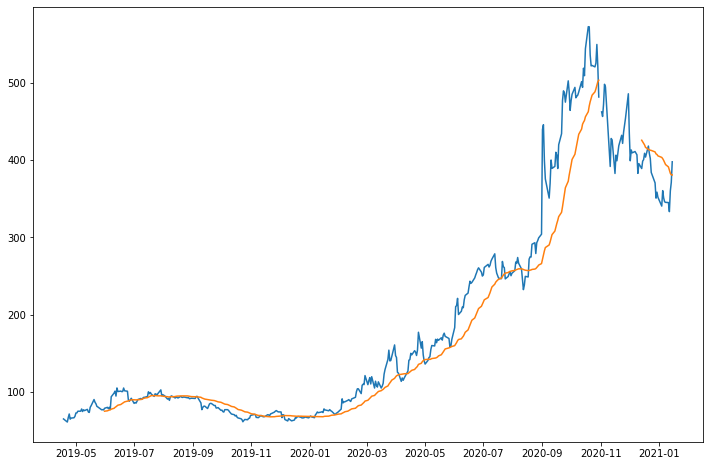

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df['1. open'])
plt.plot(df['1. open'].rolling(30).mean());

In [11]:
df['reportedDate'] = pd.to_datetime(df['reportedDate'])

In [12]:
df = df.apply(pd.to_numeric)

In [13]:
df.diff()

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,-4.00,2.900,-0.3810,3.70,-15814921.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-04-23,5.87,5.269,5.6100,3.30,-3163225.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-04-24,4.53,-2.669,-2.3900,-5.80,-1812984.0,0.0,NaN,NaN,NaN,NaN,NaN
2019-04-25,-6.66,-4.650,-0.5600,1.80,-1110254.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,-0.22,-0.040,-3.4900,-11.90,-1648856.0,0.0,NaN,NaN,NaN,NaN,NaN
2021-01-12,-11.78,8.940,-5.7500,19.10,5530078.0,0.0,NaN,NaN,NaN,NaN,NaN
2021-01-13,26.80,25.330,17.5512,7.82,5166111.0,0.0,NaN,NaN,NaN,NaN,NaN
2021-01-14,11.00,0.720,21.8488,18.61,-4745579.0,0.0,NaN,NaN,NaN,NaN,NaN


In [14]:
df.pct_change()

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,-0.061538,0.043939,-0.006316,0.059677,-0.613822,0.0,NaN,NaN,NaN,NaN,NaN
2019-04-23,0.096230,0.076473,0.093594,0.050228,-0.317920,0.0,NaN,NaN,NaN,NaN,NaN
2019-04-24,0.067743,-0.035985,-0.036461,-0.084058,-0.267145,0.0,NaN,NaN,NaN,NaN,NaN
2019-04-25,-0.093277,-0.065035,-0.008866,0.028481,-0.223233,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,-0.000637,-0.000114,-0.010254,-0.034038,-0.329165,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-12,-0.034147,0.025546,-0.017070,0.056557,1.645682,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-13,0.080432,0.070577,0.053009,0.021916,0.581086,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-14,0.030556,0.001874,0.062667,0.051038,-0.337606,0.0,0.0,0.0,0.0,0.0,0.0


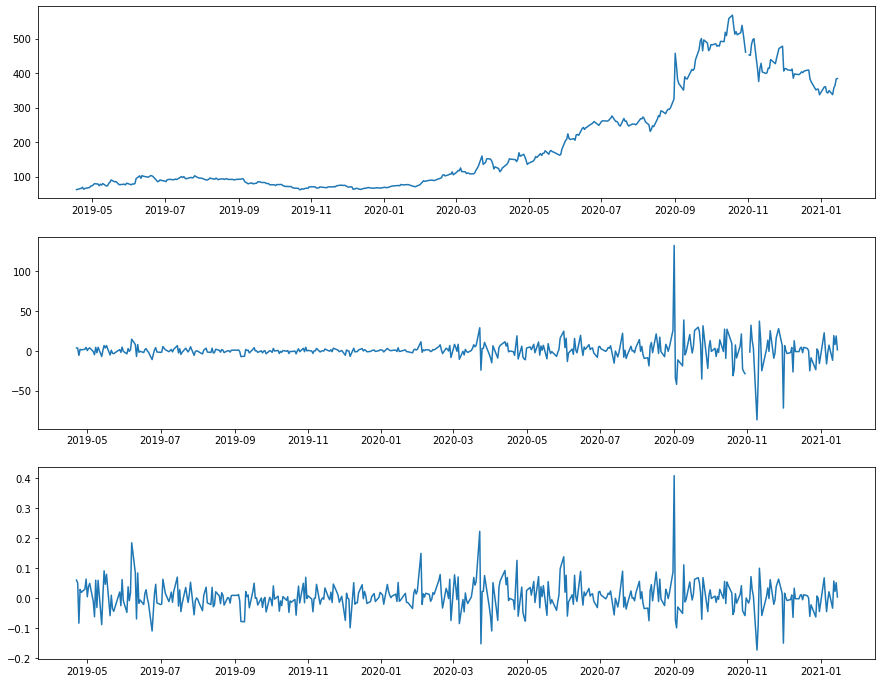

In [15]:
fig, axes = plt.subplots(nrows=3, figsize=(15,12))
axes[0].plot(df['4. close'])
axes[1].plot(df['4. close'].diff())
axes[2].plot(df['4. close'].pct_change());

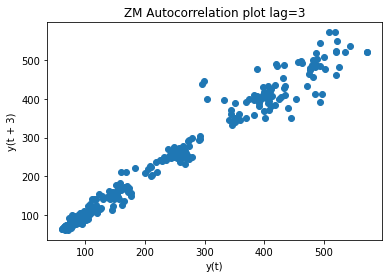

In [16]:
plt.figure()
lag_plot(df['1. open'], lag=3)
plt.title('ZM Autocorrelation plot lag=3')
plt.show()

In [17]:
df = df.fillna(0)

In [18]:
df.head()

,1. open,2. high,3. low,4. close,5. volume,reportedDate,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS
2019-04-18,65.00,66.000,60.321,62.0,25764659.0,-9223372036854775808,0.0,0.0,0.0,0.0,0.0
2019-04-22,61.00,68.900,59.940,65.7,9949738.0,-9223372036854775808,0.0,0.0,0.0,0.0,0.0
2019-04-23,66.87,74.169,65.550,69.0,6786513.0,-9223372036854775808,0.0,0.0,0.0,0.0,0.0
2019-04-24,71.40,71.500,63.160,63.2,4973529.0,-9223372036854775808,0.0,0.0,0.0,0.0,0.0
2019-04-25,64.74,66.850,62.600,65.0,3863275.0,-9223372036854775808,0.0,0.0,0.0,0.0,0.0


In [19]:
df['close_diff'] = df['4. close'].diff(1)
df['close_second_diff'] = df['4. close'].diff(1).diff(1)

In [20]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

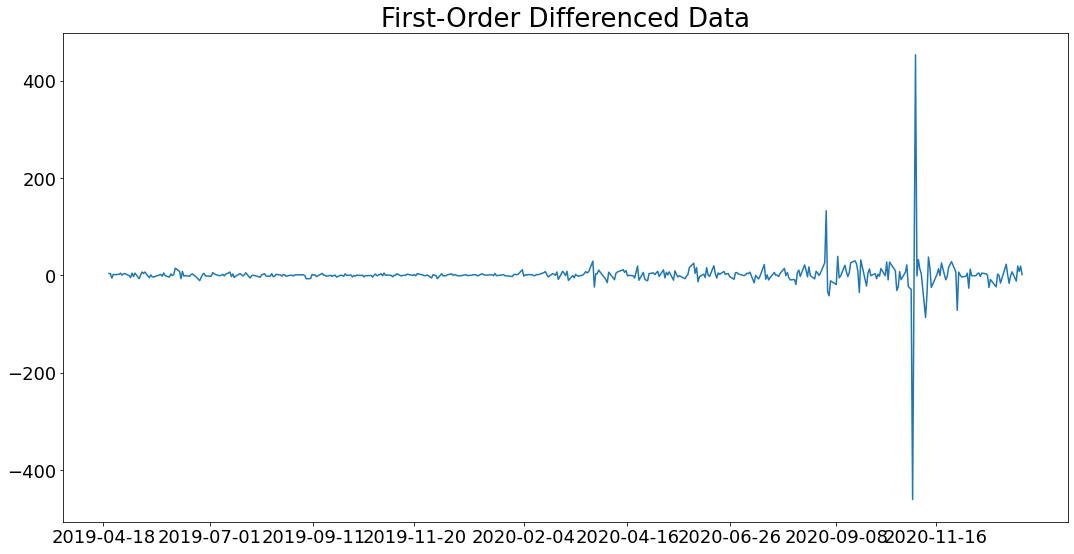

In [21]:
plot_series(df, ['close_diff'], title = "First-Order Differenced Data", steps = 50)


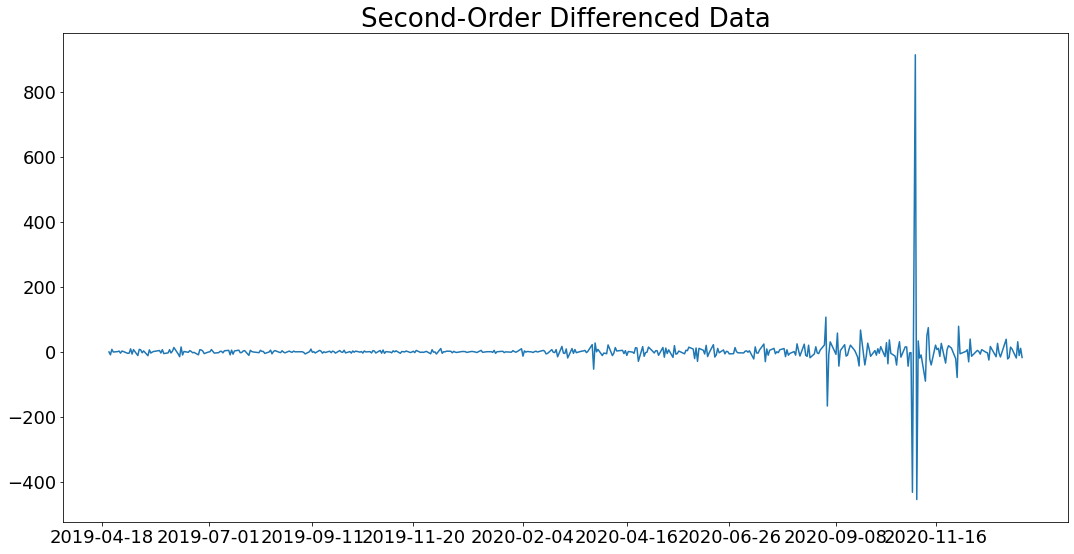

In [22]:
plot_series(df, ['close_second_diff'], title = "Second-Order Differenced Data", steps = 50)


In [23]:
adfuller(df['4. close'])

(-0.4523155212750355,
 0.9009907416363687,
 6,
 435,
 {'1%': -3.4454725477848998,
  '5%': -2.8682072297316794,
  '10%': -2.570321396485665},
 4070.8578943662305)

In [24]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [25]:
interpret_dftest(adfuller(df['4. close']))


Test Statistic   -0.452316
p-value           0.900991
dtype: float64

In [26]:
interpret_dftest(adfuller(df['close_diff'].dropna()))


Test Statistic   -1.367893e+01
p-value           1.412700e-25
dtype: float64

In [27]:
interpret_dftest(adfuller(df['close_second_diff'].dropna()))


Test Statistic   -1.080655e+01
p-value           1.956658e-19
dtype: float64

In [28]:
#remove reported date column
df = df.drop(columns = 'reportedDate')
df.head()

,1. open,2. high,3. low,4. close,5. volume,surprise,surprisePercentage,reported_Quarterly_EPS,estimated_Quarterly_EPS,reported_Annual_EPS,close_diff,close_second_diff
2019-04-18,65.00,66.000,60.321,62.0,25764659.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2019-04-22,61.00,68.900,59.940,65.7,9949738.0,0.0,0.0,0.0,0.0,0.0,3.7,NaN
2019-04-23,66.87,74.169,65.550,69.0,6786513.0,0.0,0.0,0.0,0.0,0.0,3.3,-0.4
2019-04-24,71.40,71.500,63.160,63.2,4973529.0,0.0,0.0,0.0,0.0,0.0,-5.8,-9.1
2019-04-25,64.74,66.850,62.600,65.0,3863275.0,0.0,0.0,0.0,0.0,0.0,1.8,7.6


In [29]:
# Create train-test split.
y_train, y_test = train_test_split(df['close_diff'],
                                   test_size = 0.2,
                                   shuffle = False) # Shuffle = False is IMPORTANT!

In [30]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 2858.2819021563473
Attempting to fit ARIMA(0,1,1)
The AIC for ARIMA(0,1,1) is: 2617.494024200395
Attempting to fit ARIMA(0,1,2)


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has n

The AIC for ARIMA(0,1,2) is: 2619.402359399278
Attempting to fit ARIMA(0,1,3)
The AIC for ARIMA(0,1,3) is: 2608.527083139994
Attempting to fit ARIMA(0,1,4)


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A dat

The AIC for ARIMA(0,1,4) is: 2608.7128426391037
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 2784.8965879181833
Attempting to fit ARIMA(1,1,1)
The AIC for ARIMA(1,1,1) is: 2619.4281757375493
Attempting to fit ARIMA(1,1,2)
Attempting to fit ARIMA(1,1,3)
Attempting to fit ARIMA(1,1,4)
Attempting to fit ARIMA(2,1,0)


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A dat

The AIC for ARIMA(2,1,0) is: 2745.11378362435
Attempting to fit ARIMA(2,1,1)


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the 

The AIC for ARIMA(2,1,1) is: 2614.3004503780676
Attempting to fit ARIMA(2,1,2)
Attempting to fit ARIMA(2,1,3)
Attempting to fit ARIMA(2,1,4)
Attempting to fit ARIMA(3,1,0)
The AIC for ARIMA(3,1,0) is: 2732.984324326846
Attempting to fit ARIMA(3,1,1)


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has n

The AIC for ARIMA(3,1,1) is: 2612.1988253166105
Attempting to fit ARIMA(3,1,2)
Attempting to fit ARIMA(3,1,3)
Attempting to fit ARIMA(3,1,4)
Attempting to fit ARIMA(4,1,0)
The AIC for ARIMA(4,1,0) is: 2672.513245393102
Attempting to fit ARIMA(4,1,1)


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has n

The AIC for ARIMA(4,1,1) is: 2599.902241178839
Attempting to fit ARIMA(4,1,2)
The AIC for ARIMA(4,1,2) is: 2596.3801136801458
Attempting to fit ARIMA(4,1,3)
Attempting to fit ARIMA(4,1,4)


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(4,1,2).
This model has an AIC of 2596.3801136801458.


/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has n

In [39]:
# Instantiate best model.
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (4,1,2))

# Fit ARIMA model.
arima = model.fit()

# Generate predictions based on test set.
preds = model.predict(params = arima.params,
                      start = y_test.index[0],
                      end = y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train).diff(), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test).diff(), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')

plt.title(label = 'Once-Differenced Closing Stock Price with ARIMA(4, 1, 2) Predictions', fontsize=16)
plt.show();

/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/maxbosse/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the 

KeyError: 'only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices'

Timestamp('2020-09-11 00:00:00')